# Análise Numérica
### Avaliação 01
---

Miguel Zanchettin de Oliveira.

Programa de pós-graduação em Métodos Numéricos em Engenharia. Setembro de 2024.

---


In [195]:
# To show python version
!python --version

# Grant libraries are installed
!pip install numpy==1.26.4 -q
!pip install matplotlib==3.8.0 -q
!pip install sympy==1.12 -q

import warnings
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

# Ignore warnings
warnings.filterwarnings("ignore")



Python 3.11.7


### Questão 01

Problema das Vigas: Duas Vigas de Madeira de 20 e 30 metros respectivamente se apoiam nas paredes de um galpão (Figura 1). 

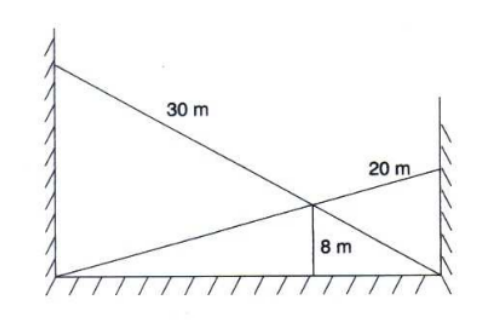

Figura 1: Ilustração do Problema (FONTE: RUGGIERO,M.A.G.; LOPES,V.L.R. Cálculo Numérica: Aspectos Teóricos e Computacionais, 1997)


Se o ponto em que se cruzam está a 8 metros do solo, qual a largura do galpão?

Resolva o problema utilizando o Método de Bissecção e o Newton de Newton-Raphson com precisão $\epsilon = 0.001$. Analise os resultados.

#### Algoritmos

In [246]:

def bissecao(f, a, b, tol=1e-6, max_iter=100):

    if f(a) * f(b) > 0:
        raise ValueError("f(a) e f(b) devem ter sinais opostos")

    for i in range(max_iter):
        # Calcula o ponto médio
        c = (a + b) / 2

        # Verifica se encontramos a raiz ou se atingimos a tolerância
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            print(f"Convergência atingida após {i + 1} iterações.")
            return c

        # Decide qual subintervalo continuar
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

    raise RuntimeError("Número máximo de iterações atingido")


In [247]:

def newton_raphson(f, df, x0, tol=1e-7, max_iter=1000):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if abs(fx) < tol:
            print(f'Convergência atingida após {i + 1} iterações.')
            return x
        
        if dfx == 0:
            raise ValueError('A derivada é zero. O método não pode continuar.')
        
        x = x - fx / dfx
        
    raise ValueError('Número máximo de iterações atingido.')


#### Função e comportamento

In [230]:

def funcao(x):
    if x**2 == 400 or x**2 == 900:
        return float('inf')
    a = (8 * x) / (400 - x ** 2)
    b = (8 * x) / (900 - x ** 2)
    return a + b - x


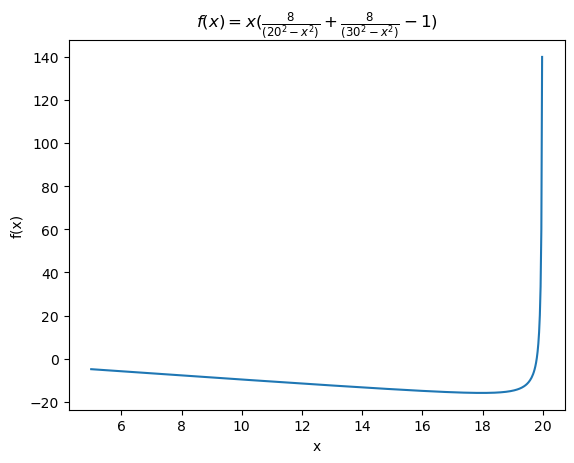

In [142]:

x = np.linspace(5, 20, 600)
y = funcao(x)

# Plota função
plt.title("$f(x) = x(\\frac{8}{(20^2 - x^2)} + \\frac{8}{(30^2 - x^2)} - 1)$")
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Portanto, a função possui vários zeros no intervalo de 0 a 100. Será ignorado o ponto (0, 0) por propriedades físicas dos materiais.

Serão separados os intervalos entre:

1) De 5 a 20
2) De 21 a 30

#### Resolução com Bissecção

In [235]:

tol = 0.001

raiz_minha = bissecao(funcao, 5, 20, tol)
raiz_bib = optimize.bisect(funcao, 5, 20, xtol=tol)

print(f"A raiz encontrada com minha função é: {round(raiz_minha, 4)}, com tolerância {tol}")
print(f"A raiz encontrada com a biblioteca é: {round(raiz_bib, 4)}, com tolerância {tol}")



Convergência atingida após 14 iterações.
A raiz encontrada com minha função é: 19.7958, com tolerância 0.001
A raiz encontrada com a biblioteca é: 19.7958, com tolerância 0.001


In [236]:

tol = 0.001

raiz_minha = bissecao(funcao, 21, 30, tol)
raiz_bib = optimize.bisect(funcao, 21, 30, xtol=tol)

print(f"A raiz encontrada com minha função é: {round(raiz_minha, 4)}, com tolerância {tol}")
print(f"A raiz encontrada com a biblioteca é: {round(raiz_bib, 4)}, com tolerância {tol}")


Convergência atingida após 14 iterações.
A raiz encontrada com minha função é: 29.8687, com tolerância 0.001
A raiz encontrada com a biblioteca é: 29.8687, com tolerância 0.001


#### Resolução com Newton Raphson

Primeiro, é necessário calcular a derivada da função.
Para evitar calculos manuais, utilizando a biblioteca sympy.

In [223]:

# Calcula a derivada
x = sp.symbols('x')
funcao = ((8 * x) / (400 - x ** 2)) + ((8 * x) / (900 - x ** 2)) - x
derivada = sp.diff(funcao, x)

# Transforma em funções
f = sp.lambdify(x, funcao)
df = sp.lambdify(x, derivada)

# Mostra equações
print(f'{funcao=}')
print(f'{derivada=}')   


funcao=-x + 8*x/(900 - x**2) + 8*x/(400 - x**2)
derivada=16*x**2/(900 - x**2)**2 + 16*x**2/(400 - x**2)**2 - 1 + 8/(900 - x**2) + 8/(400 - x**2)


In [225]:

# Estima Newton Raphson
x0 = 19
raiz = 



Convergência atingida após 5 iterações.
A raiz estimada é: 0.0


In [245]:

tol = 0.001
x0 = 19

print(50*'-')
print('Minha implementação:')
raiz_minha = newton_raphson(f, df, x0, tol=tol)
print(f'A raiz estimada é: {round(raiz, 4)}')

print(50*'-')
print('Implementação biblioteca: ')
raiz_bib = optimize.newton(f, x0, df, tol=tol, full_output=True)
print(raiz_bib[1])
print(50*'-')


--------------------------------------------------
Minha implementação:
Convergência atingida após 5 iterações.
A raiz estimada é: 19.7958
--------------------------------------------------
Implementação biblioteca: 
      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 0.0
--------------------------------------------------


In [222]:
# Mostra que f(0) = 0, de fato
f(0)

0.0

#### Análise dos resultados

* O método da Bissecção foi capaz de encontrar as raízes para o problema;
* A existência de mais de uma raiz poderia confundir o método da bissecção, que resulta apenas uma raiz por vez;
* O método de Newton Raphson não é capaz de convergir para as funções, uma vez que $f(0) = 0$;
* A convergência de Newton Raphson para $f(0) = 0$ impede que o método encontre as demais raízes da função.

---
### Questão 02

Seja o sistema de equações lineares:

$
-1.2x_1 + 5x_2 + 6x_3 + x_4 = 7
$

$
2x_1 + 3.4x_2 + x_3 = 1
$

$
-x_1 + x_2 - 3x_3 + x_4 = -2
$

$
5.6x_1 - 2x_2 + x_3 + x_4 = -2
$

Encontre a solução utilizando os métodos (todos com pivoteamento parcial). Analise os resultados.

1) Eliminação de Gauss
2) Fatoração LU
3)  Fatoração de Cholesky


In [8]:

A = np.array([
                [-1.2, 5, 6, 1],
                [2, 3.4, 1, 0],
                [-1, 1, -3, 1],
                [5.6, -2, 1, 1]
            ], dtype=float)

b = np.array([7, 1, -2, -2], dtype=float)


#### Implementação dos algoritmos

In [15]:

class GaussElimination:

    def __init__(self):
        pass

    @staticmethod
    def _eliminate(X: np.matrix, y: np.matrix) -> tuple[int, np.matrix, np.matrix]:
        n = X.shape[0]
        a = np.float64(X.copy())
        b = np.float64(y.copy())
        for iVetor in range(0, a.shape[0]):
            for iLinha in range(iVetor + 1, n):
                m = (a[iLinha, iVetor] / a[iVetor, iVetor])
                a[iLinha, iVetor] = 0
                for iProximasLinhas in range(iVetor + 1, n):
                    a[iLinha, iProximasLinhas] -= (m * a[iVetor, iProximasLinhas])
                b[iLinha] = b[iLinha] - (m * b[iVetor])
        return (n, a, b)
    
    @staticmethod
    def _solve_system(n: int, a: np.matrix, b: np.matrix) -> np.matrix:
        c = b.copy()
        for iVetor in range(n - 1, -1, -1):
            s = 0
            for iLinha in range(iVetor + 1, n):
                s += a[iVetor, iLinha] * c[iLinha]
            c[iVetor] = (b[iVetor] - s) / a[iVetor, iVetor]
        return c
    
    @staticmethod
    def solve(X: np.matrix, y: np.matrix) -> np.matrix:
        this = GaussElimination()
        n, a, b = this._eliminate(X, y)
        c = this._solve_system(n, a, b)
        return c


In [45]:

class FatoracaoLU:

    def __init__(self) -> None:
        pass

    @staticmethod
    def _pivot_rows(A: np.matrix) -> tuple[np.ndarray, np.matrix]:
        n = A.shape[0]
        a = np.float64(A.copy())

        p = np.arange(n)  
        
        for k in range(n - 1):

            r = np.argmax(np.abs(a[k:n, k])) + k  
            if np.abs(a[r, k]) == 0:
                return p, A

            if r != k:
                a[[k, r], :] = a[[r, k], :]
                p[[k, r]] = p[[r, k]]

            for i in range(k + 1, n):
                m = a[i, k] / a[k, k]
                a[i, k] = m  
                a[i, k + 1:n] -= m * a[k, k + 1:n]  

        return p, a

    @staticmethod
    def _forward_substitution(p: np.ndarray, a: np.matrix, B: np.ndarray) -> np.ndarray:
        n = a.shape[0]
        y = np.zeros(n)
        b = np.float64(B.copy())

        for i in range(n):
            y[i] = b[p[i]].item()
            for j in range(i):
                y[i] -= a[i, j] * y[j]
                
        return y

    @staticmethod
    def _backward_substitution(a: np.matrix, y: np.ndarray) -> np.ndarray:
        n = a.shape[0]
        x = np.zeros(n)

        for i in range(n - 1, -1, -1):
            x[i] = y[i]
            for j in range(i + 1, n):
                x[i] -= a[i, j] * x[j]
            x[i] /= a[i, i]

        return x

    @staticmethod
    def solve(A: np.matrix, B: np.ndarray) -> np.ndarray:
        fat = FatoracaoLU()

        p, a = fat._pivot_rows(A)
        y = fat._forward_substitution(p, a, B)
        x = fat._backward_substitution(a, y)

        return x



In [62]:

class Cholesky:
    
    def __init__(self):
        pass

    @staticmethod
    def _decompose(X: np.matrix) -> np.matrix:
        n = X.shape[0]
        L = np.zeros_like(X)
        
        for i in range(n):
            for j in range(i+1):
                if i == j:
                    L[i, j] = np.sqrt(X[i, i] - np.sum(L[i, :i]**2))
                else:
                    L[i, j] = (X[i, j] - np.sum(L[i, :j] * L[j, :j])) / L[j, j]
        
        return L

    @staticmethod
    def _solve_lower(L: np.matrix, b: np.matrix) -> np.matrix:
        n = L.shape[0]
        c = np.zeros_like(b)
        
        for i in range(n):
            c[i] = (b[i] - np.sum(L[i, :i] * c[:i])) / L[i, i]
        
        return c
    
    @staticmethod
    def _solve_upper(L: np.matrix, c: np.matrix) -> np.matrix:
        n = L.shape[0]
        x = np.zeros_like(c)
        
        for i in range(n-1, -1, -1):
            x[i] = (c[i] - np.sum(L.T[i, i+1:] * x[i+1:])) / L[i, i]
        
        return x

    @staticmethod
    def solve(X: np.matrix, y: np.matrix) -> np.matrix:

        L = Cholesky._decompose(X)
        c = Cholesky._solve_lower(L, y)
        x = Cholesky._solve_upper(L, c)
        
        if np.isnan(np.sum(x)):
            print('Matrix is not positive definite!')
            return

        return x


#### Resolução por Eliminação de Gauss

In [18]:
gauss = GaussElimination.solve(A, b)

print(f'Resultado Gauss: {list(gauss)}')

Resultado Gauss: [-0.40169133192388945, 0.2748414376321355, 0.86892177589852, -0.0697674418604652]


In [17]:
%%timeit

GaussElimination.solve(A, b)


15.9 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Resolução por Fatoração LU

In [46]:
flu = FatoracaoLU.solve(A, b)

print(f'Resultado LU: {list(flu)}')

Resultado LU: [-0.40169133192389017, 0.27484143763213514, 0.8689217758985202, -0.06976744186046517]


In [47]:
%%timeit

FatoracaoLU.solve(A, b)


60.2 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### Resolução por Fatoração de Cholesky

In [63]:
clk = Cholesky.solve(A, b)

if clk:
    print(f'Resultado Cholesky: {list(clk)}')

Matrix is not positive definite!


Para confirmação, a mesma execução na biblioteca numpy:

In [64]:

try:
    np.linalg.cholesky(A)
except np.linalg.LinAlgError as e:
    print(e)


Matrix is not positive definite


#### Análise dos resultados

* A matriz não é definida positiva, o que torna inviável a utilização do método de Fatoração de Cholesky;
* Ambos, Fatoração LU e Eliminação de Gauss resolveram o sistema com sucesso;
* Comparativamente, a Fatoração LU teve melhor desempenho do que a Eliminação de Gauss, como se é esperado pela literatura e fundamentação matemática do método.


---

## Questão 03

Considere o circuito elétrica dado na Figura 2. 

Considere também os valores de definidos 
- $R_1 = 1$ 
- $R_2 = 2$ 
- $R_3 = 1$ 
- $R_4 = 3$ 
- $R_5 = 5$ 
- $R_6 = 2$
- $R_7 = 6$ 
- $R_8 = 1$
- $R_9 = 2$
- $R_{10} = 3$ 
- $R_{11} = 8$
- $R_{12} = 8$
- $V_A = 100$ 
- $V_B = 0$

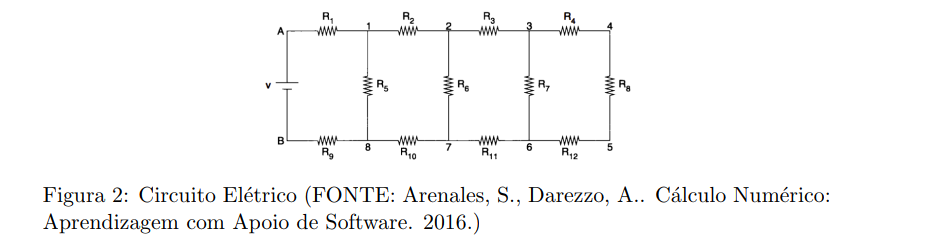

Sabendo que:
* a corrente elétrica de um nó $p$ para um nó $q$ é dada por $I_{pq} = (V_p − V_q)/R_{pq}$, onde $V_p$ e $V_q$ são voltagens (Volts) nos nós $p$ e $q$ respectivamente, e $R_{pq}$ (Ohms) é a resistência existente entre os nós p e q;

* a Lei de Kirchoff determina que a soma das correntes em cada nó é zero (Ex: $I_{A1}+I_{21}+I_{81} = 0$).

Determine as voltagens nos nós utilizando o método de Gauss-Seidel e Gradiente Conjugado. 

Verifique se a matriz do sistema é bem condicionada, e proponha um precondicionamento para o Método do Gradiente Conjugado. 

Analise todos os resultados obtidos.

In [248]:
# Base para a resolução manual (Por facilidade de visualizar a imagem):

# Passo 01:
# Determinar as correntes elétricas para cada nó

# I_{A, 1} = (V_A - V_1) / R_01
# I_{1, 2} = (V_1 - V_2) / R_02
# I_{2, 3} = (V_2 - V_3) / R_03
# I_{3, 4} = (V_3 - V_4) / R_04
# I_{1, 8} = (V_1 - V_8) / R_05
# I_{2, 7} = (V_2 - V_7) / R_06
# I_{3, 6} = (V_3 - V_6) / R_07
# I_{4, 5} = (V_4 - V_5) / R_08
# I_{8, B} = (V_8 - V_B) / R_09
# I_{8, 7} = (V_8 - V_7) / R_10
# I_{7, 6} = (V_7 - V_6) / R_11
# I_{6, 5} = (V_6 - V_5) / R_12 

# Passo 02:
# Utilizar a Lei de Kirchoff para cada nó:

# Nó 1
# 0 = I_{A, 1} + I_{2, 1} + I_{8, 1}

# Nó 2
# 0 = I_{1, 2} + I_{7, 2} + I_{3, 2}

# Nó 3
# 0 = I_{2, 3} + I_{6, 3} + I_{4, 3}

# Nó 4
# 0 = I_{3, 4} + I_{5, 4}

# Nó 5
# 0 = I_{4, 5} + I_{6, 5}

# Nó 6
# 0 = I_{5, 6} + I_{3, 6} + I_{7, 6}

# Nó 7
# 0 = I_{6, 7} + I_{2, 7} + I_{8, 7}

# Nó 8
# 0 = I_{7, 8} + I_{1, 8} + I_{B, 8}



#### Matriz do sistema (montagem manual, anexa)

In [260]:

A = np.array([
    [-17/2  ,   1/2     ,   0       ,   0       ,   0       ,   0       ,   0       ,   1/5     ],
    [1/2    ,   -2      ,   1       ,   0       ,   0       ,   0       ,   1/2     ,   0       ],
    [0      ,   1       ,   -11/6   ,   1/3     ,   0       ,   1/6     ,   0       ,   0       ],
    [0      ,   0       ,   1/3     ,   -4/3    ,   1       ,   0       ,   0       ,   0       ],
    [0      ,   0       ,   0       ,   1       ,   -9/8    ,   1/8     ,   0       ,   0       ],
    [0      ,   0       ,   1/6     ,   0       ,   1/8     ,   -5/12   ,   1/8     ,   0       ],
    [0      ,   1/2     ,   0       ,   0       ,   0       ,   1/8     ,   -23/24  ,   1/3     ],
    [1/5    ,   0       ,   0       ,   0       ,   0       ,   0       ,   1/3     ,   -31/30  ]
], dtype=float)

b = np.array([
    -100    ,   0       ,   0       ,   0       ,   0       ,   0       ,   0       ,   0       
], dtype=float)


#### Implementação dos algoritmos

In [314]:

class PCG:
    """
    
    ## Preconditioned Conjugate Gradient method to solve Ax = b.

    ### Parameters:
    tol (float): Tolerance for convergence (optional).
    max_iter (int): Maximum number of iterations (optional).

    """

    tol: float
    max_iter: int

    def __init__(self, tol=1e-10, max_iter=None, verbose = True) -> None:
        self.tol = tol
        self.max_iter = max_iter
        self.verbose = verbose
        return None

    def solve(self, A, b, M_inv=None, x0=None) -> np.array:
        """
        
        ### Parameters:
        A (ndarray): The matrix A of the system Ax = b (must be symmetric and positive-definite).
        b (ndarray): The right-hand side vector.
        M_inv (ndarray): Preconditioner matrix M^-1.
        x0 (ndarray): Initial guess for the solution (optional).

        ### Returns:
        x (ndarray): The solution vector.

        """
        n = len(b)

        if M_inv is None:
            M_inv = np.eye(n)
        
        if x0 is None:
            x0 = np.zeros(n)

        r = b - A.dot(x0)
        
        z = M_inv.dot(r)
        
        p = z.copy()
        x = x0.copy()
        
        res_norm = np.dot(r, z)
        
        for k in range(self.max_iter):
            Ap = A.dot(p)
            alpha = res_norm / np.dot(p, Ap)
            
            x = x + alpha * p    
            r_new = r - alpha * Ap
            
            # Check for convergence
            if np.linalg.norm(r_new) < self.tol:
                if self.verbose: 
                    print(f"Converged in {k+1} iterations")
                return x
                break
            
            z_new = M_inv.dot(r_new)
            
            res_norm_new = np.dot(r_new, z_new)
            beta = res_norm_new / res_norm
            
            p = z_new + beta * p
            
            r = r_new
            res_norm = res_norm_new
        
        if self.verbose:
            print(f'Did not converge in {k+1} iterations')
        
        return None


In [324]:

class GaussSeidel:
    
    def __init__(self, tol=1e-10, max_iter=1000, verbose = True) -> None:
        self.tol = tol
        self.max_iterations = max_iter
        self.verbose = verbose
        return None

    def _iterate(self, A: np.matrix, b: np.matrix, x: np.matrix) -> np.matrix:
        n = A.shape[0]
        for i in range(n):
            sum_ax = np.dot(A[i], x) - A[i, i] * x[i]
            x[i] = (b[i] - sum_ax) / A[i, i]
        return x

    def solve(self, A: np.matrix, b: np.matrix, x0: np.matrix = None) -> np.matrix:
        n = A.shape[0]
        x = x0 if x0 is not None else np.zeros((n, 1))
        x = np.float64(x)  # Ensure x is a float array

        for iteration in range(self.max_iterations):
            x_old = x.copy()
            x = self._iterate(A, b, x)

            # Check for convergence
            if np.linalg.norm(x - x_old, ord=np.inf) < self.tol:
                if self.verbose:
                    print(f"Converged in {iteration + 1} iterations")
                return x

        raise ValueError("Gauss-Seidel method did not converge within the maximum number of iterations")


#### Resolução por Gauss-Seidel

In [316]:

gauss = GaussSeidel(tol=10e-8)
gauss_result = gauss.solve(A, b)

print()
print('Voltagens: ')
for i, value in enumerate(gauss_result):
    print(f'V_{i + 1} = {round(value[0], 4)}')


Converged in 93 iterations

Voltagens: 
V_1 = 12.3025
V_2 = 7.3997
V_3 = 5.5838
V_4 = 5.6292
V_5 = 5.6443
V_6 = 5.7654
V_7 = 6.1286
V_8 = 4.3581


O método é capaz de encontrar uma solução correta, mas é altamente sensitivo ao tamanho da tolerância encontrada.

Considerando que são $8$ vetores, $93$ iterações resultam em um processamento proporcional a $\frac{93}{8} = 11,625$ iterações por linha da matriz.

#### Resolução por Gadiente Conjugado, sem precondicionamento

In [325]:

pcg = PCG(tol=10e-8, max_iter=100)

pcg_result = pcg.solve(A, b)

print()
print('Voltagens: ')
for i, value in enumerate(pcg_result):
    print(f'V_{i + 1} = {round(value, 4)}')



Converged in 8 iterations

Voltagens: 
V_1 = 12.3025
V_2 = 7.3997
V_3 = 5.5838
V_4 = 5.6292
V_5 = 5.6443
V_6 = 5.7654
V_7 = 6.1286
V_8 = 4.3581


O método de gradiente conjugado demonstra-se, de forma clara, mais eficiente do que Gauss-Seidel. 

Mesmo com uma tolerância baixa, o método é capaz de convergir em apenas 8 iterações, para 8 equações. Assim, tendo performance de $\frac{8}{8} = 1$ iteração por linha da matriz.

#### Validação de precondicionamento

In [318]:
np.linalg.cond(A)

86.45381833028688

A matriz é relativamente não é tão mal condicionada.

#### Proposta de precondicionamento

Embora Burden utilize, na página 546, $M = D^{-1/2}$, não é possível fazer o mesmo com esta matriz, uma vez que os elementos da diagonal principal são negativos. 

Ainda assim, a utilização de um precondicionamento na forma

$
    M = D^{-1}
$

Será interessante:

In [319]:

M_inv = np.linalg.inv(np.diag(np.diag(A)))


In [320]:


pcg = PCG(tol=10e-8, max_iter=100)

pcg_result = pcg.solve(A, b, M_inv)

print()
print('Voltagens: ')
for i, value in enumerate(pcg_result):
    print(f'V_{i + 1} = {round(value, 4)}')



Converged in 8 iterations

Voltagens: 
V_1 = 12.3025
V_2 = 7.3997
V_3 = 5.5838
V_4 = 5.6292
V_5 = 5.6443
V_6 = 5.7654
V_7 = 6.1286
V_8 = 4.3581


Não há alteração no número de passos para a convergência da matriz. Contudo, os cálculos computacionais são reduzidos com um precondicionamento.

Em função disso, uma comparação de tempos de execução:

In [330]:
%%timeit

# Sem precondicionamento
pcg = PCG(tol=10e-8, max_iter=100, verbose=False)
pcg.solve(A, b)


77.8 µs ± 470 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [329]:
%%timeit

# Com precondicionamento
pcg = PCG(tol=10e-8, max_iter=100, verbose=False)
pcg.solve(A, b, M_inv)


75.4 µs ± 902 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Ou seja, existe uma significativa melhora de desempenhoquando utilizado o precondicionamento sugerido.

Uma vez que se considere o tempo de processamento como medida de eficiência computacional do algoritmo, pode estimar que houve um incremento de $\frac{77.8}{55.4} - 1 = 0.032 = 3,2\%$ de eficiência considerando o precondicionamento.


--- 

Apenas relembro que as resoluções manuais estão anexas em outro arquivo.